## Problem 6(Overlap)

In [4]:
import numpy as np
import pandas as pd

In [5]:
data6=pd.read_csv(r"C:\Users\harsh\Downloads\data (1)\demo_data\6.overlap.csv",header=None)

In [6]:
data6.head()

,0,1,2
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0


In [7]:
data6[2].value_counts()

0    50
1    50
Name: 2, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data6[[0,1]],data6[2],test_size=0.10)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler6=StandardScaler()

In [10]:
data_rescaled=scaler6.fit_transform(X_train)

In [224]:
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model6=Sequential()

In [225]:
model6.add(Dense(3,activation="sigmoid",input_dim=2))
model6.add(Dense(2,activation="sigmoid"))
model6.add(Dense(1,activation="sigmoid"))

In [226]:
model6.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_134 (Dense)           (None, 3)                 9         
                                                                 
 dense_135 (Dense)           (None, 2)                 8         
                                                                 
 dense_136 (Dense)           (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [227]:
model6.compile(optimizer="adam",loss="binary_crossentropy")

In [228]:
model6.fit(X_train,y_train,batch_size=10,epochs=300,verbose=1)

Epoch 1/300
9/9 [==============================] - 0s 1ms/step - loss: 0.7041
Epoch 2/300
9/9 [==============================] - 0s 872us/step - loss: 0.7029
Epoch 3/300
9/9 [==============================] - 0s 872us/step - loss: 0.7017
Epoch 4/300
9/9 [==============================] - 0s 1ms/step - loss: 0.7012
Epoch 5/300
9/9 [==============================] - 0s 1ms/step - loss: 0.7002
Epoch 6/300
9/9 [==============================] - 0s 938us/step - loss: 0.6995
Epoch 7/300
9/9 [==============================] - 0s 1ms/step - loss: 0.6990
Epoch 8/300
9/9 [==============================] - 0s 1ms/step - loss: 0.6985
Epoch 9/300
9/9 [==============================] - 0s 1ms/step - loss: 0.6981
Epoch 10/300
9/9 [==============================] - 0s 1ms/step - loss: 0.6977
Epoch 11/300
9/9 [==============================] - 0s 1ms/step - loss: 0.6979
Epoch 12/300
9/9 [==============================] - 0s 1ms/step - loss: 0.6969
Epoch 13/300
9/9 [==============================] - 0s 

Epoch 204/300
9/9 [==============================] - 0s 1ms/step - loss: 0.6902
Epoch 205/300
9/9 [==============================] - 0s 1ms/step - loss: 0.6903
Epoch 206/300
9/9 [==============================] - 0s 749us/step - loss: 0.6902
Epoch 207/300
9/9 [==============================] - 0s 997us/step - loss: 0.6902
Epoch 208/300
9/9 [==============================] - 0s 1ms/step - loss: 0.6902
Epoch 209/300
9/9 [==============================] - 0s 872us/step - loss: 0.6902
Epoch 210/300
9/9 [==============================] - 0s 1ms/step - loss: 0.6902
Epoch 211/300
9/9 [==============================] - 0s 1ms/step - loss: 0.6901
Epoch 212/300
9/9 [==============================] - 0s 872us/step - loss: 0.6901
Epoch 213/300
9/9 [==============================] - 0s 1ms/step - loss: 0.6904
Epoch 214/300
9/9 [==============================] - 0s 997us/step - loss: 0.6901
Epoch 215/300
9/9 [==============================] - 0s 872us/step - loss: 0.6901
Epoch 216/300
9/9 [=========

In [229]:
pred_=model6.predict(X_train)

3/3 [==============================] - 0s 1ms/step


In [230]:
pred_=np.ravel(np.where(pred_<0.5,0,1))
pred_=pd.Series(pred_)
pred_.index=y_train.index
pred_

0     0
59    0
88    0
7     0
44    0
     ..
51    0
43    0
33    0
86    0
94    0
Length: 90, dtype: int32

<AxesSubplot:xlabel='0', ylabel='1'>

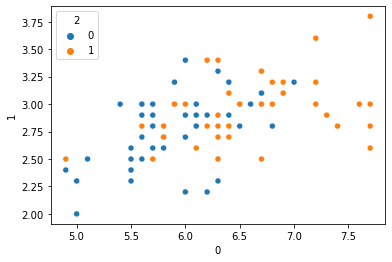

In [231]:
sns.scatterplot(x=X_train[0],y=X_train[1],hue=y_train)

<AxesSubplot:xlabel='0', ylabel='1'>

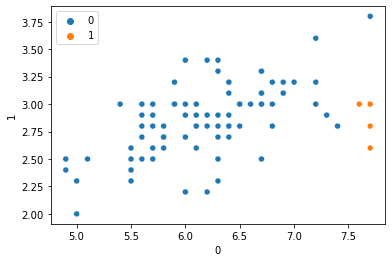

In [232]:
sns.scatterplot(x=X_train[0],y=X_train[1],hue=pred_)

In [233]:
metrics.accuracy_score(y_train,pred_)

0.5555555555555556

#### Using batch normalization and weights initialization

In [44]:
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization
model6_=Sequential()

In [45]:
model6_.add(Dense(3,activation="relu",input_dim=2, kernel_initializer='glorot_normal'))
model6_.add(Dense(2,activation="relu", kernel_initializer='glorot_normal'))
model6_.add(Dense(2,activation="relu", kernel_initializer='he_normal'))
model6_.add(BatchNormalization())
model6_.add(Dense(1,activation="sigmoid"))

In [46]:
model6_.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [47]:
model6_.fit(X_train,y_train,batch_size=10,epochs=200,verbose=1,validation_split=0.2)

Epoch 1/200
8/8 [==============================] - 1s 21ms/step - loss: 0.7921 - accuracy: 0.2917 - val_loss: 1.2344 - val_accuracy: 0.3889
Epoch 2/200
8/8 [==============================] - 0s 6ms/step - loss: 0.7871 - accuracy: 0.2639 - val_loss: 1.1562 - val_accuracy: 0.3889
Epoch 3/200
8/8 [==============================] - 0s 5ms/step - loss: 0.7890 - accuracy: 0.2222 - val_loss: 1.0835 - val_accuracy: 0.3889
Epoch 4/200
8/8 [==============================] - 0s 5ms/step - loss: 0.7743 - accuracy: 0.2778 - val_loss: 1.0121 - val_accuracy: 0.3889
Epoch 5/200
8/8 [==============================] - 0s 3ms/step - loss: 0.7795 - accuracy: 0.2917 - val_loss: 0.9546 - val_accuracy: 0.3889
Epoch 6/200
8/8 [==============================] - 0s 3ms/step - loss: 0.7656 - accuracy: 0.3333 - val_loss: 0.9041 - val_accuracy: 0.3889
Epoch 7/200
8/8 [==============================] - 0s 5ms/step - loss: 0.7659 - accuracy: 0.3056 - val_loss: 0.8619 - val_accuracy: 0.3889
Epoch 8/200
8/8 [=========

8/8 [==============================] - 0s 5ms/step - loss: 0.6624 - accuracy: 0.6528 - val_loss: 0.6878 - val_accuracy: 0.5556
Epoch 60/200
8/8 [==============================] - 0s 5ms/step - loss: 0.6619 - accuracy: 0.6667 - val_loss: 0.6817 - val_accuracy: 0.6667
Epoch 61/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6608 - accuracy: 0.6389 - val_loss: 0.6809 - val_accuracy: 0.6111
Epoch 62/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6548 - accuracy: 0.6528 - val_loss: 0.6836 - val_accuracy: 0.6667
Epoch 63/200
8/8 [==============================] - 0s 5ms/step - loss: 0.6681 - accuracy: 0.6528 - val_loss: 0.7109 - val_accuracy: 0.4444
Epoch 64/200
8/8 [==============================] - 0s 4ms/step - loss: 0.6553 - accuracy: 0.6944 - val_loss: 0.7025 - val_accuracy: 0.4444
Epoch 65/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6545 - accuracy: 0.6528 - val_loss: 0.6893 - val_accuracy: 0.6111
Epoch 66/200
8/8 [===============

8/8 [==============================] - 0s 3ms/step - loss: 0.6009 - accuracy: 0.7222 - val_loss: 0.7042 - val_accuracy: 0.5556
Epoch 118/200
8/8 [==============================] - 0s 5ms/step - loss: 0.6219 - accuracy: 0.6667 - val_loss: 0.7002 - val_accuracy: 0.5556
Epoch 119/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6130 - accuracy: 0.6528 - val_loss: 0.6999 - val_accuracy: 0.5556
Epoch 120/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6197 - accuracy: 0.6944 - val_loss: 0.7229 - val_accuracy: 0.5000
Epoch 121/200
8/8 [==============================] - 0s 5ms/step - loss: 0.5898 - accuracy: 0.6944 - val_loss: 0.7404 - val_accuracy: 0.3889
Epoch 122/200
8/8 [==============================] - 0s 5ms/step - loss: 0.6141 - accuracy: 0.6806 - val_loss: 0.7304 - val_accuracy: 0.5000
Epoch 123/200
8/8 [==============================] - 0s 3ms/step - loss: 0.6030 - accuracy: 0.7222 - val_loss: 0.7307 - val_accuracy: 0.5000
Epoch 124/200
8/8 [========

8/8 [==============================] - 0s 3ms/step - loss: 0.5205 - accuracy: 0.6944 - val_loss: 0.9221 - val_accuracy: 0.4444
Epoch 176/200
8/8 [==============================] - 0s 3ms/step - loss: 0.5813 - accuracy: 0.7083 - val_loss: 0.9081 - val_accuracy: 0.4444
Epoch 177/200
8/8 [==============================] - 0s 5ms/step - loss: 0.5131 - accuracy: 0.8056 - val_loss: 0.8990 - val_accuracy: 0.5000
Epoch 178/200
8/8 [==============================] - 0s 3ms/step - loss: 0.5199 - accuracy: 0.7361 - val_loss: 0.8487 - val_accuracy: 0.5000
Epoch 179/200
8/8 [==============================] - 0s 3ms/step - loss: 0.5614 - accuracy: 0.7083 - val_loss: 0.7972 - val_accuracy: 0.5556
Epoch 180/200
8/8 [==============================] - 0s 3ms/step - loss: 0.5451 - accuracy: 0.7361 - val_loss: 0.7861 - val_accuracy: 0.5556
Epoch 181/200
8/8 [==============================] - 0s 5ms/step - loss: 0.5598 - accuracy: 0.7083 - val_loss: 0.7761 - val_accuracy: 0.5556
Epoch 182/200
8/8 [========

In [48]:
pred6=model6_.predict(X_train)

3/3 [==============================] - 0s 1ms/step


In [49]:
pred6=np.ravel(np.where(pred6<0.5,0,1))
pred6=pd.Series(pred6)
pred6.index=y_train.index
pred6

76    0
54    1
82    0
20    0
22    0
     ..
8     1
85    1
62    1
5     0
2     1
Length: 90, dtype: int32

In [50]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 2s 539us/step


<AxesSubplot:>

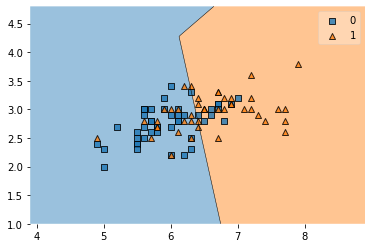

In [51]:
plot_decision_regions(X_train[[0,1]].values,y_train.values.astype(int),clf=model6_)

In [52]:
from sklearn import metrics
metrics.accuracy_score(y_train,pred6)

0.6888888888888889

3888/3888 [==============================] - 2s 589us/step


<AxesSubplot:>

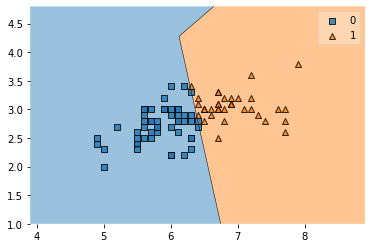

In [53]:
plot_decision_regions(X_train[[0,1]].values,pred6.values.astype(int),clf=model6_)

<AxesSubplot:xlabel='0', ylabel='1'>

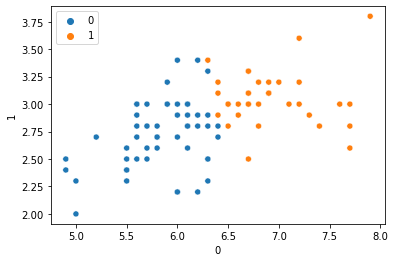

In [55]:
import seaborn as sns
sns.scatterplot(x=X_train[0],y=X_train[1],hue=pred6)